# Clustering

In [1]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

from embeddingStructure import embeddingStructure
import matplotlib.pyplot as plt
from batch import batch
import numpy as np
from tqdm import tqdm
import clustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# Create batches
filename = "/home/ubuntu/sampled_embeddings.csv"
features = 1024

batch_01 = batch()
batch_01.load(filename, 1, 1000)

# Create matrix in correct format
X = np.empty((len(batch_01.items), features), dtype=np.float16)
for i in range(len(batch_01.items)):
    X[i,:] = batch_01.items[i].data

In [3]:
# set cluster
cluster = clustering.Cluster()
cluster.set_metric(clustering.METRIC.COSINE)

### Plot loss function 

In [4]:
Steps = 20
loss = np.empty(Steps - 1 )
lossxValue = np.empty(Steps - 1)
for i in range(0, Steps - 1):
    cluster.load(X)
    cluster.k = i + 1
    cluster.set_random_centroids()
    cluster.run_iteration(3)
    loss[i] = cluster.loss
    lossxValue[i] = i + 1

381.0135015831169
381.0135015831169
381.0135015831169
363.7914842546812
356.6061886221218
354.86626891133557
357.89821766441867
346.05062148600786
342.9778095180083
348.3591382138389
337.5751633668623
332.8820186084607
334.9651342530979
325.5227704905542
322.7704085194743
336.3159379282198
320.61149582174824
315.8003129978056
318.90745211835593
310.9859371171365
309.016448940983
324.90795171219105
313.4656528075604
310.4151695897038
319.61229333736185
306.4708948194379
303.24037675016484
326.6177836870153
310.6561350887332
304.3822320605339
317.8119095442401
297.57375096443576
292.920578240121
312.64871316740766
298.2898097508222
293.25409526015994
301.86464492521134
291.70379395043005
288.534535039297
304.91906163804384
292.5934006662332
287.0584132110636
298.6885010630888
287.33034738020336
283.4108634595757
290.39952137109987
281.0720782696482
278.7954645455427
299.4769226592661
282.0980216688228
275.2581124441851
296.78779937650535
281.88920365157617
276.08761426298474
285.91027642

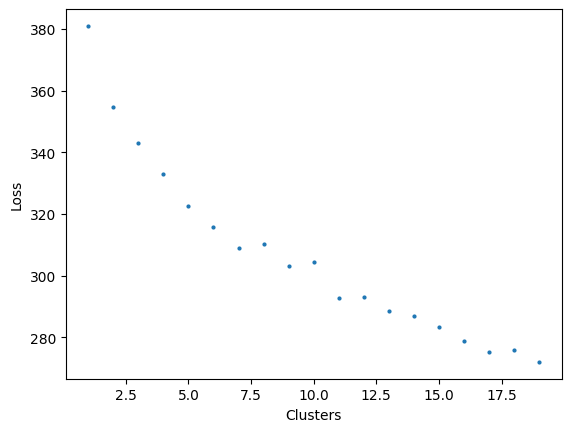

In [6]:
# plot loss function
plt.scatter(lossxValue, loss, s = 4)
plt.xlabel("Clusters")
plt.ylabel("Loss")
plt.show()

# Note: You will notice some variability because the medoids are selected randomly, so just
# make sure you have the correct number of iterations, the treand should be similar.

### Creating clusters

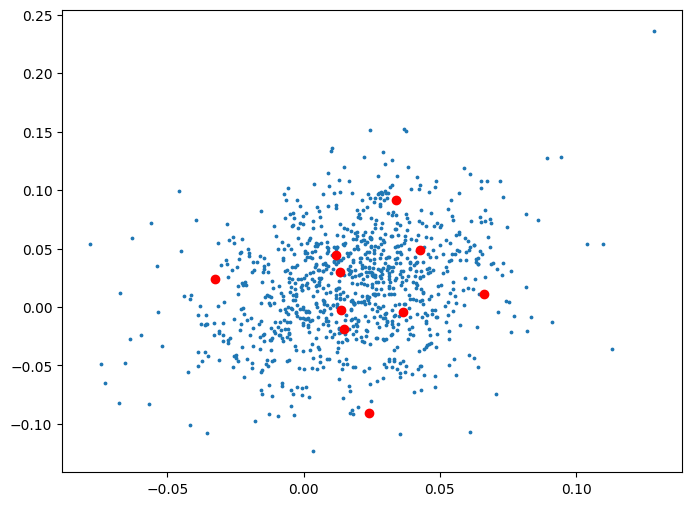

313.32268141522667
297.99930018553823
294.691814386247
293.79676106099845
293.38914632575404
293.05834601866025
292.78085550072774
292.58440724059744
292.46270755450803
292.42174139230525
292.4144376233257
292.38951149037297
292.3770257794842
292.35631717142695
292.35631717142695
292.35631717142695
292.35631717142695
292.35631717142695
292.35631717142695
292.35631717142695


In [5]:
# Using our implementation we run using k = 3
cluster.load(X)
cluster.k = 10
cluster.set_metric(clustering.METRIC.COSINE)
cluster.set_random_centroids()
cluster.plot_datapoints(0,1)
cluster.run_iteration(20)

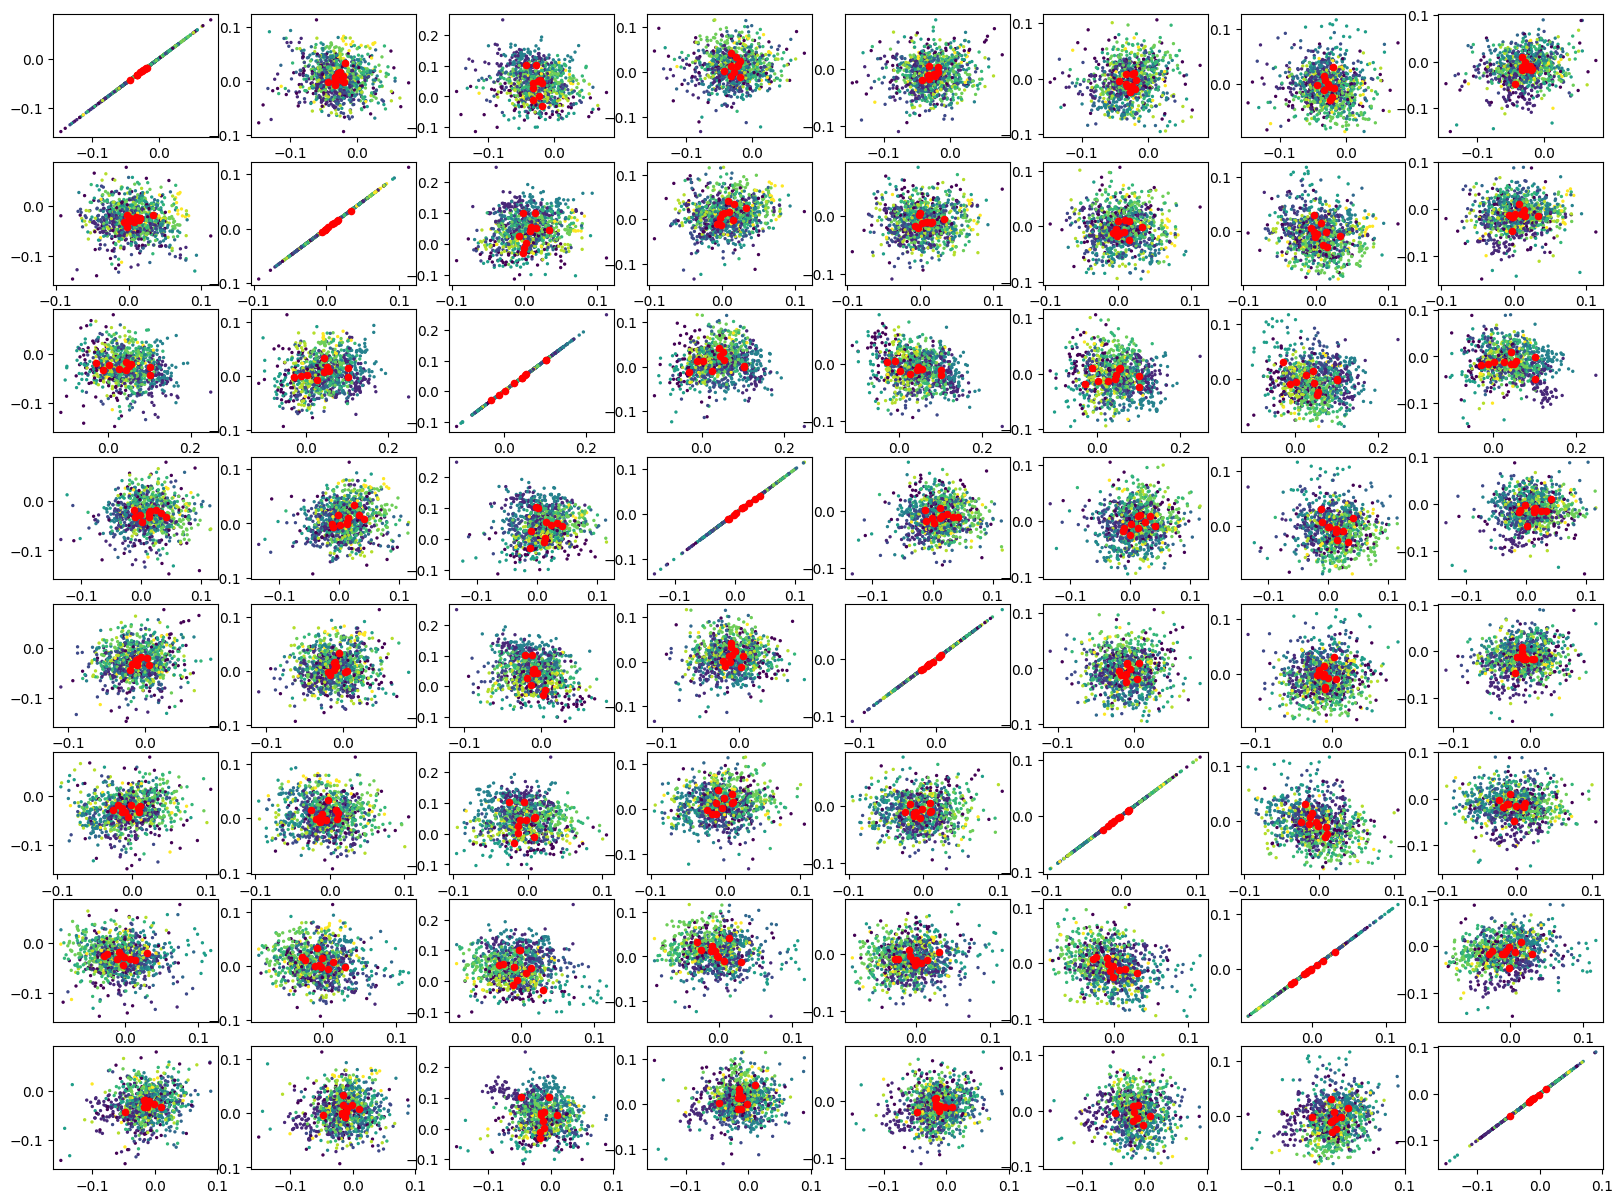

In [7]:
# we plot only 8x8 features at the time and start with the index 0-0
cluster.plot_classification_map(20,20)